<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course_content/module3_convnets/Using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 29s 0us/step


In [2]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model, show_shapes=True, show_layer_names=True, to_file='vgg.png')
from google.colab import files
files.download('vgg.png')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving dog-2109.jpg to dog-2109.jpg


In [0]:
from keras.preprocessing.image import load_img
image = load_img('dog-2109.jpg', target_size=(224, 224))


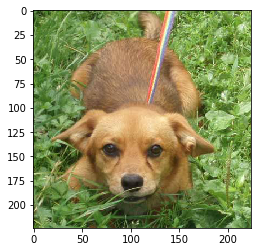

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [0]:

from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [0]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [0]:

from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [0]:
# predict the probability across all output classes
yhat = model.predict(image)

In [22]:
print(yhat.shape)

(1, 1000)


In [27]:
import numpy as np
np.set_printoptions(precision=4)
print(yhat[0, :10])

[1.3116e-10 1.4024e-09 4.1266e-14 2.0786e-14 2.0135e-11 3.4413e-10
 1.3124e-11 2.4573e-10 1.0768e-07 1.6432e-13]


In [0]:
from keras.applications.vgg16 import decode_predictions

In [29]:
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Pembroke (72.93%)
